# Advanced Text Analytics Lab 1

This notebook is the first of two lab notebooks that you will submit as part of your assessment for the Advanced Data Analytics unit. 

This notebook is contains three sections:
1. **Word embeddings:** This will introduce you to loading and training word embeddings using the Gensim library.
2. **Introducing neural text classifiers:** Here we show you how to construct a neural network text classifier for sentiment analysis using Pytorch. 
3. **Improving neural text classifiers:** This section gives you a chance to improve the classifier from the previous section by applying what we have learned in the lectures.

## Learning Outcomes

These sections will contain tutorial-like instructions, as you have seen in previous text analytics labs. On completing these sections, the intended learning outcomes are that you will be able to...
1. Load pretrained word embeddings models.
1. Learn word embeddings from an unlabelled dataset.
1. Recognise the steps required to train and test a neural text classifier with Pytorch
1. Adapt the architecture of a neural text classifier.

## Getting Started -- Python Packages

Please see the README.md file for instructions on setting up your Python environment. The readme will instruct you to install the required packages, in addition to those used for Introduction to Data Analytics:

 * pytorch=1.9.0
 * scipy=1.8.0
 * transformers=2.1.1

## Your Tasks

Inside each of these sections there are several **'To-do's**, which you must complete for your summative assessment. Your marks will be based on your answers to these to-dos. Please make sure to:
1. Include the output of your code in the saved notebook. Plots and printed output should be visible without re-running the code. 
1. Include all code needed to generate your answers.
1. Provide sufficient comments to understand how your method works.
1. Write text in a cell in markdown format where a written answer is required. You can convert a cell to markdown format by pressing Escape-M. 

There are also some unmarked 'to-do's that are part of the tutorial to help you learn how to implement and use the methods studied here. These do not contribute to your final marks.

## Good Academic Practice

Please follow [the guidance on academic integrity provided by the university](http://www.bristol.ac.uk/students/support/academic-advice/academic-integrity/).
You are required to write your own answers -- do not share your notebooks or copy someone else's writing. Do not copy text or long blocks of code directly into the notebook from online sources -- always rewrite in your own way. Breaking the rules can lead to strong penalties. 

## Marking Criteria

1. The coursework (both notebooks) is worth 30% of the unit in total. 
1. There is a total of 100 marks available for both lab notebooks. 
1. This notebook is worth 50 of those marks.
1. The number of marks for each to-do out of 100 is shown alongside each to-do.
1. For to-dos that require you to write code, a good solution would meet the following criteria (in order of importance):
   1. Solves the task or answers the question asked in the to-do. This means, if the code cells in the notebook are executed in order, we will get the output shown in your notebook.
   1. The code is easy to follow and does not contain unnecessary steps.
   1. The comments show that you understand how your solution works.
   1. A very good answer will also provide code that is computationally efficient but easy to read.
1. You can use any suitable publicly available libraries. Unless the task explicitly asks you to implement something from scratch, there is no penalty for using libraries to implement some steps.

## Support

The main source of support will be during the remaining lab sessions (Fridays 3-6pm) for this unit. 

The TAs and lecturer will help you with questions about the lectures, the code provided for you in this notebook, and general questions about the topics we cover. For the marked 'to-dos', they can only answer clarifying questions about what you have to do. 

Office hours: You can book office hours with Edwin on Mondays 3pm-5pm by sending him an email (edwin.simpson@bristol.ac.uk). If those times are not possible for you, please contact him by email to request an alternative. 

## Deadline

The notebook must be submitted along with the second notebook on Blackboard before **Wednesday 24th May at 13.00**. 

## Submission

You will need to zip up this notebook and the next notebook into a single .zip file, which you will submit to Blackboard through the 'assessment, submission and feedback' link on the left sidebar. 

Please name your files like this:
   * Name this notebook ADA1_<student_number>.ipynb
   * Name the zip file <student_number>.zip
   * Please don't include your name as we want to mark anonymously to ensure fairness. 

# 1. Word Embeddings (max. 12 marks)

In this section we will use both sparse vectors and dense word2vec embeddings to obtain
vector representations of words and documents. 

First, we will load the `tweet eval` sentiment dataset.

In [1]:
#!pip install torch

In [2]:
#pip install transformers

In [3]:
#conda install -c pytorch pytorch

In [4]:
import numpy as np
import pandas as pd
import torch

%load_ext autoreload
%autoreload 2

In [5]:
# standard random seed code
RS = 43
np.random.seed(RS)

In [6]:
from datasets import load_dataset
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer

cache_dir = "./data_cache"

train_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="train",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Training dataset with {len(train_dataset)} instances loaded")


dev_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="validation",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Development/validation dataset with {len(dev_dataset)} instances loaded")


test_dataset = load_dataset(
    "tweet_eval",
    name="sentiment",
    split="test",
    ignore_verifications=True,
    cache_dir=cache_dir,
)

print(f"Test dataset with {len(test_dataset)} instances loaded")

# Put the data into lists ready for the next steps...
train_texts = []
train_labels = []
for i in tqdm(range(len(train_dataset))):
    train_texts.append(train_dataset[i]['text'])
    train_labels.append(train_dataset[i]['label'])
            
# HINT: A count vectorizer object may be useful in later steps
vectorizer = CountVectorizer()
vectorizer.fit(train_texts)

# Get the vocabulary
vocab = vectorizer.vocabulary_
vocab_size = len(vocab)
print(f'The vocabulary has {vocab_size} words')

# invert the vocabulary dictionary so we can look up word types given an index
keys = vocab.values()
values = vocab.keys()
vocab_inverted = dict(zip(keys, values))

print(f'Index of "love" is {vocab["love"]}')

C:\Users\antro\anaconda3\envs\data_analytics\lib\site-packages\datasets\load.py:1748: FutureWarning: 'ignore_verifications' was deprecated in favor of 'verification_mode' in version 2.9.1 and will be removed in 3.0.0.
You can remove this warning by passing 'verification_mode=no_checks' instead.
  warnings.warn(


Found cached dataset tweet_eval (C:/Users/antro/OneDrive - University of Bristol/ADVANCED DA/Assignment/advanced-labs-public/data_cache/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Training dataset with 45615 instances loaded


Found cached dataset tweet_eval (C:/Users/antro/OneDrive - University of Bristol/ADVANCED DA/Assignment/advanced-labs-public/data_cache/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Development/validation dataset with 2000 instances loaded


Found cached dataset tweet_eval (C:/Users/antro/OneDrive - University of Bristol/ADVANCED DA/Assignment/advanced-labs-public/data_cache/tweet_eval/sentiment/1.1.0/12aee5282b8784f3e95459466db4cdf45c6bf49719c25cdb0743d71ed0410343)


Test dataset with 12284 instances loaded


100%|██████████████████████████████████████████████████████████████████████████| 45615/45615 [00:10<00:00, 4366.20it/s]


The vocabulary has 43358 words
Index of "love" is 22981


In [7]:
print(train_texts[0])

"QT @user In the original draft of the 7th book, Remus Lupin survived the Battle of Hogwarts. #HappyBirthdayRemusLupin"


## 1.1. Term-Document Matrix

First we are going to obtain sparse word vectors from a term-document matrix.

**TO-DO 1a:** Use CountVectorizer to obtain a term-document matrix for the training set. Then, write a function that takes a word as an argument and returns its term vector from the term-document matrix you computed. Get the term vector for the word 'love'. **(4 marks)**

In [8]:
# WRITE YOUR ANSWER HERE
term_doc_matrix = vectorizer.transform(train_texts)

# make array, it is SPARSE (loads of zeroes...)
term_doc_arr = term_doc_matrix.toarray()

def term_vector_func(word):
    
    # check if in vocab
    if word not in vocab:
        return None
    
    # find the index
    index = vocab[word]
    
    # slice the array
    term_vec = term_doc_arr[:, index]
    
    return term_vec

term_vector_func('love')

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
# test
word = 'love'
print(term_vector_func(word))
print(np.sum(term_vector_func(word))) # how many loves are there?
print(term_doc_arr.shape)

[0 0 0 ... 0 0 0]
1165
(45615, 43358)


In [10]:
# saved for later...
vec1 = term_vector_func('love')
print(np.sum(vec1)) # how many loves are there?

1165


In [11]:
# Define a list of words for comparison with 'love' in the next to-do.
comparison_words = ['2wee', '4your', 'follow', 'goodnight', 'liam', 'lol', 'okay', 'sorry',
 'wish', 'yea', 'affair', 'agree', 'all', 'alliums', 'alliumsvancouver', 'always',
 'amazing', 'and', 'appreciate', 'ask', 'babe', 'baby', 'bandit76044', 'barat',
 'beautiful', 'birthday', 'boy', 'bro', 'btw', 'but', 'commando', 'content',
 'dear', 'dm', 'dream', 'dreams', 'enjoy', 'enjoyed', 'everything', 'fam',
 'followers', 'for', 'forever', 'forget', 'friend', 'friends', 'gabrielle',
 'girl', 'god', 'good', 'guys', 'hahaha', 'happy', 'hate', 'hello', 'hey',
 'homework', 'hope', 'in', 'invite', 'is', 'isabel', 'it', 'jonny', 'kiss', 'know',
 'krishna', 'ladies', 'let', 'life', 'like', 'lil', 'little', 'love', 'loved',
 'loves', 'loving', 'lucky', 'luv', 'ma', 'may', 'me', 'mean', 'meet', 'met', 'miss',
 'much', 'my', 'notice', 'nsfanfic', 'nuffsaid', 'nya', 'of', 'on', 'one',
 'ontario', 'perfect', 'prefer', 'queen', 'rails', 'rather', 'recommend',
 'remember', 'see', 'share', 'sing', 'smile', 'so', 'suggest', 'sunat', 'sweet',
 'tag', 'tail', 'tebaklagu', 'thank', 'thanks', 'the', 'this', 'thsoul', 'to',
 'tomorrow', 'too', 'true', 'unreservedly', 'user', 'want', 'weed', 'what', 'wish',
 'wishes', 'with', 'women_of_christ', 'would', 'wow', 'xxxxxx', 'yay', 'yes',
 'you', 'your', 'zorro',
]

**TO-DO 1b:** Write a function that computes the similarity between two different term vectors. For this to-do, do not simply call a library function that implements a similarity function, implement the calculation yourself. Use the function to find the five most similar terms to "love" from the list of `comparison_words` given above. **(6 marks)**

In [12]:
# WRITE YOUR OWN CODE HERE
def vec_similarity(vec1, vec2):
    
    # compute cosine similarity as it's the most efficeint
    cosine = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    
    return cosine

In [13]:
# test
print(vec_similarity(term_vector_func('hogwarts'), term_vector_func('remus')))
print(vec_similarity(term_vector_func('remus'), term_vector_func('remus')))

0.26726124191242434
0.9999999999999999


In [14]:
# save scores
sim_scores = [] 

# loop through comparison words
for word in comparison_words:
    
    # call term_vecor_func for index
    vec = term_vector_func(word)
    
    # call vec_similarity to get scores
    score = vec_similarity(vec1, vec)
    
    # save scores with words
    sim_scores.append((word, score))
    
    # sort by order 
    sim_scores = sorted(sim_scores, key= lambda x: x[1], reverse = True)


In [15]:
# and print top 5
for i in range(5):
    print(f"{sim_scores[i][0]}: {sim_scores[i][1]}")

love: 1.0
you: 0.14170441974255654
user: 0.09879910847998889
the: 0.08769922256389782
and: 0.08543046072802546


## 1.2 Word Embeddings

Now, we will use Gensim to train a word2vec model. The code below tokenizes the training texts, then runs word2vec (the skipgram model) to learn a set of embeddings. 

In [16]:
from gensim.models import word2vec
from gensim.utils import tokenize

tokenized_texts = [list(tokenize(text)) for text in train_texts]
emb_model = word2vec.Word2Vec(tokenized_texts, sg=1, min_count=1, window=3, vector_size=100, seed=RS) # set seed for reproduction

In [17]:
# get the word vector for 'love'
love_embedding = emb_model.wv['love']

In [18]:
# test
print(love_embedding)

[ 0.16631474 -0.48225152 -0.25843954 -0.44090095  0.3928382   0.5833793
 -0.12158396 -0.29807925 -0.03933381  0.8585071   0.3043204   0.24186969
  0.5593922  -0.02499146  0.1905925   0.14818457  0.19131526  1.0682832
  0.40958095  0.21718262  0.40154684  0.14201911 -0.03931415  0.48603472
  0.7329576  -0.29003602 -0.08416633 -0.03884136 -0.11392399  0.03674777
 -0.21091631 -0.14405496  1.2057221  -0.16230723 -0.4153238  -0.07912897
 -0.19533849 -0.02813501  0.384049   -0.2751845   0.03617313  0.53632885
  0.609674    0.28731692 -0.8030949   0.16486071 -0.11556037  0.09253763
 -0.712378    0.2976228  -0.1223518  -0.46814126  0.04120122 -0.26754996
 -0.59569335  0.2858729  -0.06307255 -0.01719492  0.21789804 -0.3435625
 -0.25722724  0.40298495  0.08416083  0.03055922  0.39887354  0.04559938
 -0.13961041 -0.5504062  -0.01809539 -0.1566532   0.4221355  -0.6991656
 -0.05366715 -0.45803767  0.0364367  -0.20393112  0.69767874 -0.21464267
 -0.57962257 -0.5138707   0.06094097  0.21533555 -0.197

**TODO 1c:** Find the five most similar words to 'love' according to your word2vec model. You can use the Gensim function `similar_by_word` to do this. How does the Word2Vec top 5 differ from the top 5 comparison words found using the term-document matrix? **(2 marks)**

WRITE YOUR ANSWER HERE


In [19]:
# WRITE YOUR OWN CODE HERE

# variable for number of words
n = 5

# use Gensim fuctnion
similar_words = emb_model.wv.similar_by_word('love', topn=n)

# print
for word, score in similar_words:
    print(f"{word}: {score}")

appreciate: 0.8308498859405518
Wish: 0.8273220062255859
loving: 0.824156641960144
dear: 0.8204566836357117
Okay: 0.8194510340690613


In [20]:
# test
emb_model.wv.similarity('love', 'loved')

0.8163198

Above, we trained our own model using the skipgram method. We can also download a pretrained model that has previously been trained on a large corpus. There is a list of models available [here](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models). Let's try out GLoVe embeddings. GLoVe is an alternative to the skipgram model. This model was trained on a corpus of tweets:

In [21]:
import gensim.downloader

glove_wv = gensim.downloader.load('glove-twitter-25')

In [22]:
# show the vector for Hamlet:
# print(glove_wv['Hamlet'])

print(glove_wv['love'])

[-0.62645  -0.082389  0.070538  0.5782   -0.87199  -0.14816   2.2315
  0.98573  -1.3154   -0.34921  -0.8847    0.14585  -4.97     -0.73369
 -0.94359   0.035859 -0.026733 -0.77538  -0.30014   0.48853  -0.16678
 -0.016651 -0.53164   0.64236  -0.10922 ]


TODO 1d: Find the most similar five words to 'happy' according to the GloVe Twitter model. (this task is unmarked)

In [23]:
# WRITE YOUR OWN CODE HERE

# use Gensim function for similarity
g_similar_words = glove_wv.similar_by_word('love', topn=n)

# print the top n words
for word, score in g_similar_words:
    print(f"{word}: {score}")

you: 0.944882869720459
baby: 0.9425430297851562
dream: 0.9267041683197021
miss: 0.924690842628479
much: 0.921525239944458


Notice again that a different set of words are favoured than with word2vec or term-document vectors, and consider how this might result from pretraining the embeddings on Twitter data.

- The scores are much higher in the word embeddings and pretrained models, especially in the case of pretrained Twitter data which may have similar properties as the tweet eval dataset.

# 2. Introducing Neural Text Classifiers (max. 16 marks)

This section shows you how to implement a neural network classifier using Pytorch and leads you through the steps required to process text sequences.

There are several big advantages to building a text classifier using a neural network:
   * It can model nonlinear functions, so can handle much more complex relationships between features and class labels.
   * It performs representation learning: the hidden layers learn how to extract features from low-level data.
   * It can process sequences of tokens -- we don't have to think in terms of a single feature vector representing a document as we did for logistic regression.
  
The downsides are:
   * Much more expensive to train and test.
   * It can overfit very badly to small datasets.
   * The features learned by the hidden layers can be hard to interpret, which can make it hard to predict the model's behaviour, e.g., what sort of cases it may fail on.
   
Let's start by building a neural network text classifier that takes a sequence of tokens as input, and predicts a class label. For simplicity, it will use a single fully connected feedforward layer. 


We are going to construct the neural network in this form:

<img src="neural_text_classifier_smaller.png" alt="Neural text classifier diagram" width="600px"/>

The first step -- as always -- is to get our data into the right format. We start from a set of tokenised documents (in this case, tweets), where each document is represented as a sequence of text tokens. The neural network cannot process the tokens as strings, so we need to convert each token to a numerical input value. The input value for each token is used to look up the corresponding embedding in the embedding layer. For PyTorch, it's not necessary to create one-hot vectors for each token, as library just uses the indexes of the words in the vocabulary to look up the corresponding word embedding. 

So, let's now map the tokens to their IDs -- their indexes in the vocabulary:

In [24]:
# tokenize training set and convert to input IDs.
def encode_text(sample):
    tokens = tokenize(sample['text'])  # Tokenize one document
    
    input_ids = []
    for token in tokens:
        if str.lower(token) in vocab:  # Skip words from the dev/test set that are not in the vocabulary.
            input_ids.append(vocab[str.lower(token)]+1) # +1 is needed because we reserve 0 as a special character
            
    sample['input_ids'] = input_ids 
    return sample

# The map method of the dataset object takes a function as its argument, 
# and applies that function to each document in the dataset.
train_dataset = train_dataset.map(encode_text)
len(train_dataset)

Map:   0%|          | 0/45615 [00:00<?, ? examples/s]

45615

Our neural network's input layer has a fixed size, so we need to make all of our documents have the same number of tokens. Let's plot a histogram to understand the length distribution of the texts in the training set:

Mean of the document length: 18.160166611860134
Median of the document length: 18.0
Maximum document length: 32


(array([   21.,   522.,  2430.,  4908.,  7772., 11003., 10389.,  6738.,
         1719.,   113.]),
 array([ 1. ,  4.1,  7.2, 10.3, 13.4, 16.5, 19.6, 22.7, 25.8, 28.9, 32. ]),
 <BarContainer object of 10 artists>)

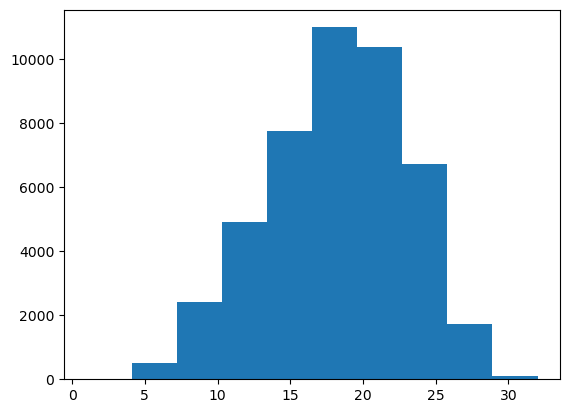

In [25]:
import matplotlib.pyplot as plt

rv_l = [len(doc) for doc in train_dataset['input_ids']]
print('Mean of the document length: {}'.format(np.mean(rv_l)))
print('Median of the document length: {}'.format(np.median(rv_l)))
print('Maximum document length: {}'.format(np.max(rv_l)))

plt.hist(rv_l)

We now neeed to choose a fixed sequence length, then *pad* the documents that are shorter than this maximum by adding a special token to the start of the sequence. The special pad token has an input value of 0. Any documents that exceed the length will be truncated.

**TO-DO 2a:** Complete the padding code below to insert 0s at the start of any sequences that are too short, and to truncate any sequences that are too long. **(3 marks)**

In [26]:
sequence_length = 40  # truncate all docs longer than this. Pad all docs shorter than this.

def pad_text(sample):
    ###WRITE YOUR OWN CODE HERE
    sequence = sample['input_ids']
    length = len(sequence)
    
    # if too short add 0 at start
    if length < sequence_length:
        paddy = [0] * (sequence_length - length) 
        sequence = sequence + paddy
        
    # if too long then truncate
    elif length > sequence_length:
        sequence = sequence[-sequence_length:] # Max length was = 32
    
    sample['input_ids'] = sequence
    return sample

# The map method will call pad_text for every document in the dataset
train_dataset = train_dataset.map(pad_text)

Map:   0%|          | 0/45615 [00:00<?, ? examples/s]

In [27]:
# test to look for padding and length
print(print(train_dataset[0]["input_ids"]))

print(len(train_dataset[0]["input_ids"]))

[30525, 40507, 19053, 37895, 27691, 11887, 27218, 37895, 37843, 5732, 31658, 23160, 36905, 37895, 4450, 27218, 18008, 17197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
None
40


We now have our data in almost the right format! To train a model using PyTorch, we are going to wrap our dataset in a [DataLoader object](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). This allows the training process to select random subsets of the dataset -- mini-batches -- which it will use for learning with mini-batch stochastic gradient descent.

In [29]:
from torch.utils.data import DataLoader, TensorDataset

batch_size = 64

# convert from the Huggingface format to a TensorDataset so we can use the mini-batch sampling functionality
def convert_to_data_loader(dataset, num_classes):
    # convert from list to tensor
    input_tensor = torch.from_numpy(np.array(dataset['input_ids']))
    label_tensor = torch.from_numpy(np.array(dataset['label'])).long()
    tensor_dataset = TensorDataset(input_tensor, label_tensor)
    loader = DataLoader(tensor_dataset, batch_size=batch_size, shuffle=True)

    return loader

num_classes = len(np.unique(train_labels))   # number of possible labels in the sentiment analysis task

train_loader = convert_to_data_loader(train_dataset, num_classes)

Let's process the development and test set as well.

In [30]:
dev_dataset = dev_dataset.map(encode_text) # applying the mappings to data sets
dev_dataset = dev_dataset.map(pad_text)
dev_loader = convert_to_data_loader(dev_dataset, num_classes)

test_dataset = test_dataset.map(encode_text)
test_dataset = test_dataset.map(pad_text)
test_loader = convert_to_data_loader(test_dataset, num_classes)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/12284 [00:00<?, ? examples/s]

Map:   0%|          | 0/12284 [00:00<?, ? examples/s]

As shown in the diagram above, we will build a NN with three different layers for sentiment classification.

### Embedding layer
In the embedding layer, the network will create its own embeddings for the index with a given embedding dimension.
The module `nn.Embedding()` creates a simple lookup table that stores embeddings of a fixed dictionary and size.
This module is often used to store word embeddings and retrieve them using indices.
The module's input is a list of indices, and the output is the corresponding word embeddings.

[Documentation for Embedding Class](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html)

### Fully-connected layer
Fully-connected layers in a neural network are those layers where all the inputs from the previous layer are connected to every unit of the fully-connected layer. Here we will use fully-connected layers for the hidden layer and output layer. In Pytorch this kind of layer is implemented by the 'Linear' class:

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

## Activation functions
In Pytorch, the activation function is not included in the Linear class (or other kinds of neural network layer), so we need to explicitly connect each layer to an activation function.
In Pytorch, we construct a neural network by connecting up the output of each component to the input of the next, thereby creating a computation graph.
To complete the hidden layer, we connect the ouput of the linear layer to a ReLU activation function, thereby creating a nonlinear function.

The cell below defines a class for our neural text classifier. The constructor creates each of the layers and the activations. The dimensions of each layer need to be correct so that the output of one layer can be passed as input to the next, but the code is not yet complete.

Below the constructor is the forward method. This is called in the 'forward pass' to map the neural network's inputs to its outputs. In PyTorch, we pass data through each layer of the model, connecting them together, then returning the output of the final layer.

**TO-DO 2b** Complete the constructor and the forward method below for a NN with three layers. The places where you need to add code are marked in the cell below. Refer to the Pytorch documentation for additional help.  **(2 marks)**

In [31]:
from torch import nn

class FFTextClassifier(nn.Module):
    
    def __init__(self, vocab_size, sequence_length, embedding_size, hidden_size, num_classes):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_size

        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        self.embedding_layer = nn.Embedding(vocab_size, embedding_size) # embedding layer
        
        ### COMPLETE THE CODE HERE: WRITE IN THE MISSING ARGUMENTS SPECIFYING THE DIMENSIONS OF EACH LAYER
        self.hidden_layer = nn.Linear(sequence_length * embedding_size, hidden_size) # Fully connected hidden layer
        self.activation = nn.ReLU() # Hidden layer
        ##########
        
        self.output_layer = nn.Linear(hidden_size, num_classes) # Fully connected output layer

        
    def forward (self, input_words):
        # Input dimensions are:  (batch_size, seq_length)
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)

        # flatten the sequence of embedding vectors for each document into a single vector.
        embedded_words = embedded_words.reshape(embedded_words.shape[0], sequence_length*self.embedding_size)  # batch_size, seq_length*embedding_size

        z = self.hidden_layer(embedded_words)   # (batch_size, seq_length, hidden_size)
        
        ### ADD THE MISSING LINE HERE
        h = self.activation(z)
        ########

        output = self.output_layer(h)                      # (batch_size, num_classes)

        # Notice we haven't applied a softmax activation to the output layer -- it's not required by Pytorch's loss function.

        return output

Now the class is complete. 

TO-DO 2c: In the next cell, create a NN with the FFTextClassifier class we wrote. (unmarked)

Hint: `ff_classifier_model = FFTextClassifier(...)`

In [32]:
vocab_size = len(vectorizer.vocabulary_) + 1

embedding_size = 10  # number of dimensions for embeddings, 
hidden_size = 8      # number of hidden units

###WRITE YOUR OWN CODE HERE
ff_classifier_model = FFTextClassifier(vocab_size = vocab_size, 
                                       embedding_size = embedding_size, 
                                       hidden_size = hidden_size,
                                       sequence_length = sequence_length,
                                       num_classes = num_classes
                                      )

After desigining our network, we need to create a training function to calculate the loss for each input and perform backpropagation to optimise the network.
During training, the weights of all the layers will be updated.

Below, we build a training function to train the NN over a fixed number of epochs (an epoch is one iteration over the whole training dataset).
The function also prints the performance of both training and development/validation set after each epoch.

Here we use cross-entropy loss, which is the standard loss function for classification that we also used for logistic regression. The module `nn.CrossEntropyLoss()` operates directly on the output of our output layer, so we don't have to implement the softmax layer within the forward() method.

Cross Entropy Loss: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

The optimizer object implements a particular algorithm for updating the weights. Here, we will use the Adam optimizer, which is a variant of stochastic gradient descent method that tends to find a better solution in a smaller number of iterations than standard SGD.

Optimization: https://pytorch.org/docs/stable/optim.html

The cell below defines a training function for our classifier:

from torch import optim

def train_nn(num_epochs, model, train_dataloader, dev_dataloader):
    
    learning_rate = 0.0005  # learning rate for the gradient descent optimizer, related to the step size

    loss_fn = nn.CrossEntropyLoss()  # create loss function object
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # create the optimizer
    
    # initialise array for epoch losses
    train_epochs = []
    dev_epochs = []
    
    for e in range(num_epochs):
        # Track performance on the training set as we are learning...
        total_correct = 0
        total_trained = 0
        train_losses = []

        model.train()  # Put the model in training mode.

        for i, (batch_input_ids, batch_labels) in enumerate(train_dataloader):
            # Iterate over each batch of data
            # print(f'batch no. = {i}')

            optimizer.zero_grad()  # Reset the optimizer

            # Use the model to perform forward inference on the input data.
            # This will run the forward() function.
            output = model(batch_input_ids)

            # Compute the loss for the current batch of data
            batch_loss = loss_fn(output, batch_labels)

            # Perform back propagation to compute the gradients with respect to each weight
            batch_loss.backward()

            # Update the weights using the compute gradients
            optimizer.step()

            # Record the loss from this sample to keep track of progress.
            train_losses.append(batch_loss.item())

            # Count correct labels so we can compute accuracy on the training set
            predicted_labels = output.argmax(1)
            total_correct += (predicted_labels == batch_labels).sum().item()
            total_trained += batch_labels.size(0)

        train_accuracy = total_correct / total_trained * 100
        
        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Training Loss: {:.4f}".format(np.mean(train_losses)),
              "Training Accuracy: {:.4f}%".format(train_accuracy))
        
        # return the training losses at each epoch
        train_epochs.append(np.mean(train_losses))
        
        # Compute accuracy on dev set after this training epoch
        
        model.eval()  # Switch model to evaluation mode - turn off any random steps such as dropout
        total_correct = 0
        total_trained = 0
        dev_losses = []
        
        for dev_input_ids, dev_labels in dev_dataloader:

            dev_output = model(dev_input_ids)

            # Compute the loss for the current batch of data
            dev_loss = loss_fn(dev_output, dev_labels)

            # Record the loss from this sample to keep track of progress.
            dev_losses.append(dev_loss.item())
    
            # Count the number of correct predictions
            predicted_labels = dev_output.argmax(1)
            total_correct += (predicted_labels == dev_labels).sum().item()
            total_trained += dev_labels.size(0)
            
        dev_accuracy = total_correct / total_trained * 100
        
        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Validation Loss: {:.4f}".format(np.mean(dev_losses)),
              "Validation Accuracy: {:.4f}%".format(dev_accuracy))
        
        # return the development (or 'validation') losses at each epoch
        dev_epochs.append(np.mean(dev_losses))
        
    return model, train_epochs, dev_epochs

#  adding time taken to train each epoch to measure impact of the improvements and an optional parameter for l2 regularisation

In [33]:
import time
from torch import optim

def train_nn(num_epochs, model, train_dataloader, dev_dataloader, l2_reg=0): # additional paramter for l2

    learning_rate = 0.0005  # learning rate for the gradient descent optimizer, related to the step size

    loss_fn = nn.CrossEntropyLoss()  # create loss function object
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2_reg)  # create the optimizer
    
    # initialise array for epoch losses
    train_epochs = []
    dev_epochs = []
    
    for e in range(num_epochs):
        start_time = time.time()  # Start the timer
        
        # Track performance on the training set as we are learning...
        total_correct = 0
        total_trained = 0
        train_losses = []

        model.train()  # Put the model in training mode.

        for i, (batch_input_ids, batch_labels) in enumerate(train_dataloader):
            # Iterate over each batch of data
            # print(f'batch no. = {i}')

            optimizer.zero_grad()  # Reset the optimizer

            # Use the model to perform forward inference on the input data.
            # This will run the forward() function.
            output = model(batch_input_ids)

            # Compute the loss for the current batch of data
            batch_loss = loss_fn(output, batch_labels)

            # Perform back propagation to compute the gradients with respect to each weight
            batch_loss.backward()

            # Update the weights using the compute gradients
            optimizer.step()

            # Record the loss from this sample to keep track of progress.
            train_losses.append(batch_loss.item())

            # Count correct labels so we can compute accuracy on the training set
            predicted_labels = output.argmax(1)
            total_correct += (predicted_labels == batch_labels).sum().item()
            total_trained += batch_labels.size(0)

        train_accuracy = total_correct / total_trained * 100
        
        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Training Loss: {:.4f}".format(np.mean(train_losses)),
              "Training Accuracy: {:.4f}%".format(train_accuracy))
        
        # return the training losses at each epoch
        train_epochs.append(np.mean(train_losses))
        
        # Compute accuracy on dev set after this training epoch
        
        model.eval()  # Switch model to evaluation mode - turn off any random steps such as dropout
        total_correct = 0
        total_trained = 0
        dev_losses = []
        
        for dev_input_ids, dev_labels in dev_dataloader:

            dev_output = model(dev_input_ids)

            # Compute the loss for the current batch of data
            dev_loss = loss_fn(dev_output, dev_labels)

            # Record the loss from this sample to keep track of progress.
            dev_losses.append(dev_loss.item())
    
            # Count the number of correct predictions
            predicted_labels = dev_output.argmax(1)
            total_correct += (predicted_labels == dev_labels).sum().item()
            total_trained += dev_labels.size(0)
            
        dev_accuracy = total_correct / total_trained * 100
        
        # return the development (or 'validation') losses at each epoch
        dev_epochs.append(np.mean(dev_losses))
        
        end_time = time.time()  # Stop the timer
        epoch_duration = end_time - start_time  # Calculate the time taken for the epoch

        print("Epoch: {}/{}".format((e+1), num_epochs),
              "Validation Loss: {:.4f}".format(np.mean(dev_losses)),
              "Validation Accuracy: {:.4f}%".format(dev_accuracy),
              "Time taken: {:.2f} seconds".format(epoch_duration))  # Print the time taken for the epoch
        
    return model, train_epochs, dev_epochs

**TO-DO 2d:** Modify the training function above to return the training and development (or 'validation') losses at each epoch. Train the network for 15 epochs and plot the losses. Describe what the plot shows, and how you could use this information to improve the training process. **(8 marks)**

EXPLAIN YOUR ANSWER HERE


## My answer - how to use the plot, improving the training process
The function computes the training/validation losses and accuracies at the end of each epoch to monitor the model’s performance. When plotting these losses against the number of epochs, we generally observe a decline in both training and validation losses as the number of epochs increases. This pattern signifies that the model is learning from the training data. We then see a point at four epochs where the validation losses begin to fall more slowly, eventually flattening out (and possibly starting to increase again). This suggests that the model is overfitting the training data, i.e. performing well on the training data but poorly on the validation data, which is a clear sign of overfitting.

We could improve the process and address the overfitting in several ways, for example, using regularisation techniques, such as L1 and L2, increasing the training dataset size, or using data augmentation. We can also tune other hyperparameters, such as the embedding size and hidden layers (adding more), to reduce entropy loss. We can model these using Gridsearch to help find the optimal hyperparameters that result in the lowest validation loss (which could be time-consuming). Lastly, consider implementing early stopping in our training process. Early stopping involves ending the training process if the validation loss has not decreased for several epochs, thus preventing overfitting.


In [34]:
###WRITE YOUR OWN CODE HERE
num_epochs = 15

ant_model1, train_epochs, dev_epochs = train_nn(num_epochs, ff_classifier_model, train_loader, dev_loader)

Epoch: 1/15 Training Loss: 1.0163 Training Accuracy: 45.1715%
Epoch: 1/15 Validation Loss: 1.0183 Validation Accuracy: 43.5500% Time taken: 8.42 seconds
Epoch: 2/15 Training Loss: 1.0092 Training Accuracy: 45.4938%
Epoch: 2/15 Validation Loss: 1.0189 Validation Accuracy: 43.3500% Time taken: 9.32 seconds
Epoch: 3/15 Training Loss: 1.0026 Training Accuracy: 46.7346%
Epoch: 3/15 Validation Loss: 1.0066 Validation Accuracy: 45.1000% Time taken: 10.58 seconds
Epoch: 4/15 Training Loss: 0.9860 Training Accuracy: 49.6459%
Epoch: 4/15 Validation Loss: 0.9949 Validation Accuracy: 49.7500% Time taken: 9.75 seconds
Epoch: 5/15 Training Loss: 0.9578 Training Accuracy: 52.8554%
Epoch: 5/15 Validation Loss: 0.9820 Validation Accuracy: 51.4500% Time taken: 9.25 seconds
Epoch: 6/15 Training Loss: 0.9247 Training Accuracy: 55.4664%
Epoch: 6/15 Validation Loss: 0.9625 Validation Accuracy: 52.0500% Time taken: 9.71 seconds
Epoch: 7/15 Training Loss: 0.8924 Training Accuracy: 57.6039%
Epoch: 7/15 Validat

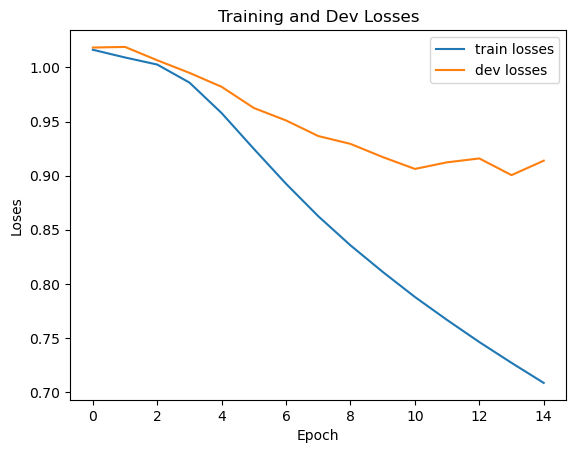

In [35]:
import matplotlib.pyplot as plt

# plot train and dev accuracy
plt.plot(train_epochs, label='train losses')
plt.plot(dev_epochs, label='dev losses')
plt.xlabel('Epoch')
plt.ylabel('Loses')
plt.title('Training and Dev Losses')
plt.legend()
plt.show()

The code below obtains predictions from our neural network:

In [36]:
def predict_nn(trained_model, test_loader):

    trained_model.eval()  # switch off some randomisation used during training (dropout) to give consistent predictions

    correct = 0  # count the number of correct classification labels

    gold_labs = []  # gold labels to return
    pred_labs = []  # predicted labels to return
    
    for inputs, labels in test_loader:
        test_output = trained_model(inputs)  # run the forward() function on the inputs
        predicted_labels = test_output.argmax(1)  # select the class labels with highest logits as our predictions

        gold_labs.extend(labels.tolist())
        pred_labs.extend(predicted_labels.tolist())
    
    return gold_labs, pred_labs


In [38]:
gold_labs, pred_labs = predict_nn(ant_model1, test_loader)

In [39]:
# test
print("First 5 items in gold_labs:", gold_labs[:5])
print("First 5 items in pred_labs:", pred_labs[:5])

First 5 items in gold_labs: [2, 1, 1, 2, 0]
First 5 items in pred_labs: [2, 1, 1, 2, 0]


Now, we can use pretrained word embeddings instead of learning them from scratch during training.
Here, we will use the pretrained GloVe embeddings that we loaded before. The embedding matrix is used to initialise the embedding layer. The code below converts the GloVe embeddings into an embedding matrix suitable for PyTorch:

In [40]:
embedding_matrix = torch.zeros((vocab_size, glove_wv.vector_size))

for word in vocab:
    word_idx = vocab[word]
    if word in glove_wv:
        embedding_matrix[word_idx, :] = torch.from_numpy(glove_wv[word])
        
print(embedding_matrix)

C:\Users\antro\AppData\Local\Temp\ipykernel_16508\3169321362.py:6: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:212.)
  embedding_matrix[word_idx, :] = torch.from_numpy(glove_wv[word])


tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.3535,  0.0987,  0.1718,  ...,  0.4630,  1.3101,  1.1314],
        [-0.4106,  0.1487,  0.0637,  ...,  0.6097,  1.0935,  0.9614],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [41]:
# copy for the warning...

embedding_matrix = torch.zeros((vocab_size, glove_wv.vector_size))

vocab_in_glove_count = 0

for word in vocab:
    word_idx = vocab[word]
    if word in glove_wv:
        embedding_matrix[word_idx, :] = torch.from_numpy(glove_wv[word].copy())
        vocab_in_glove_count += 1

print("Number of words in both vocabulary and GloVe: ", vocab_in_glove_count)
print(embedding_matrix)


Number of words in both vocabulary and GloVe:  33348
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.3535,  0.0987,  0.1718,  ...,  0.4630,  1.3101,  1.1314],
        [-0.4106,  0.1487,  0.0637,  ...,  0.6097,  1.0935,  0.9614],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [42]:
# how many words are in GloVe?
vocab_in_glove_count = sum(1 for word in vocab if word in glove_wv)

print("Number of words in both vocabulary and GloVe: ", vocab_in_glove_count)

Number of words in both vocabulary and GloVe:  33348


The class below extends the FFTextClassifier class (it's incomplete for now -- you'll fix this in a minute!). This means that it inherits all of its functionality, but we overwrite the constructor (the `__init__` method). This way, we don't need to define the forward function again, as it will be the same as before.

The embedding layer is now different as it loads pretrained embeddings from our matrix. The argument `freeze` determines whether the embeddings remain fixed to their pretrained values (if `freeze=True`) or are updated through backpropagation to fit them to the dataset.

In [43]:
class FFTextClassifierWithEmbeddings(FFTextClassifier):

    def __init__(self, hidden_size, sequence_length, num_classes, embedding_matrix):
        super(FFTextClassifier, self).__init__()

        self.embedding_size = embedding_matrix.shape[1] 

        # Here we just need to construct the components of our network. We don't need to connect them together yet.
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=True) # embedding layer

        ### COMPLETE THE ARGUMENTS TO SPECIFY THE DIMENSIONS OF THE LAYERS
        
        # Hidden layer
        self.hidden_layer = nn.Linear(sequence_length * self.embedding_size, hidden_size) 
        
        # Hidden layer activation
        self.activation = nn.ReLU() 
        
        # Fully connected layer
        self.output_layer = nn.Linear(hidden_size, num_classes) 

In [44]:
ff_classifier_model_we = FFTextClassifierWithEmbeddings(hidden_size = hidden_size,
                                                        sequence_length = sequence_length,
                                                        num_classes = num_classes,
                                                        embedding_matrix = embedding_matrix 
                                                        )

**TO-DO 2e:** Complete the arguments in the `FFTextClassifierWithEmbeddings` constructor to set the dimensions of the neural network layers.  Repeat the experiment above using the FFTextClassifierWithEmbeddings with the GLoVe embeddings. Choose a suitable performance metric and compare the performance of the two neural text classifiers. Explain in one or two sentences the possible reason(s) for any performance differences you observe. **(3 marks)**

WRITE YOUR ANSWER HERE:

According to the chosen metrics, Ant Model 1 outperforms Ant Model 2 regarding the accuracy and the F1 score. This shows that Ant Model 1 is more efficient in making correct predictions and maintaining a better balance between precision and recall.

Implementing the GloVe embeddings did not improve Ant Model 2, suggesting that the pre-trained embeddings may not adequately represent the vocabulary of the input data. It is also possible that the task or dataset does not benefit significantly from the semantic relations captured by the GloVe embeddings, or the data might need further preprocessing to use these embeddings effectively.

Performance metrics:
Ant Model 1 - Accuracy: 54.93%, F1 Score: 0.53 
Ant Model 2 - Accuracy: 42.18%, F1 Score: 0.38

In [45]:
### WRITE YOUR OWN CODE BELOW

# previous model
#ant_model1, train_epochs, dev_epochs = train_nn(num_epochs, ff_classifier_model, train_loader, dev_loader)

# different model name using the improved classifier with Glove embeddings, all other parameters equal
ant_model2, train_epochs, dev_epochs = train_nn(num_epochs, ff_classifier_model_we, train_loader, dev_loader)

Epoch: 1/15 Training Loss: 1.0202 Training Accuracy: 45.9345%
Epoch: 1/15 Validation Loss: 0.9961 Validation Accuracy: 47.3500% Time taken: 3.37 seconds
Epoch: 2/15 Training Loss: 0.9844 Training Accuracy: 49.1176%
Epoch: 2/15 Validation Loss: 0.9912 Validation Accuracy: 47.5000% Time taken: 3.31 seconds
Epoch: 3/15 Training Loss: 0.9716 Training Accuracy: 49.8389%
Epoch: 3/15 Validation Loss: 0.9874 Validation Accuracy: 47.8500% Time taken: 3.47 seconds
Epoch: 4/15 Training Loss: 0.9621 Training Accuracy: 50.3672%
Epoch: 4/15 Validation Loss: 0.9890 Validation Accuracy: 48.5000% Time taken: 3.30 seconds
Epoch: 5/15 Training Loss: 0.9548 Training Accuracy: 51.0797%
Epoch: 5/15 Validation Loss: 0.9873 Validation Accuracy: 48.6000% Time taken: 3.35 seconds
Epoch: 6/15 Training Loss: 0.9481 Training Accuracy: 51.5225%
Epoch: 6/15 Validation Loss: 0.9904 Validation Accuracy: 48.5000% Time taken: 3.49 seconds
Epoch: 7/15 Training Loss: 0.9417 Training Accuracy: 51.9610%
Epoch: 7/15 Validati

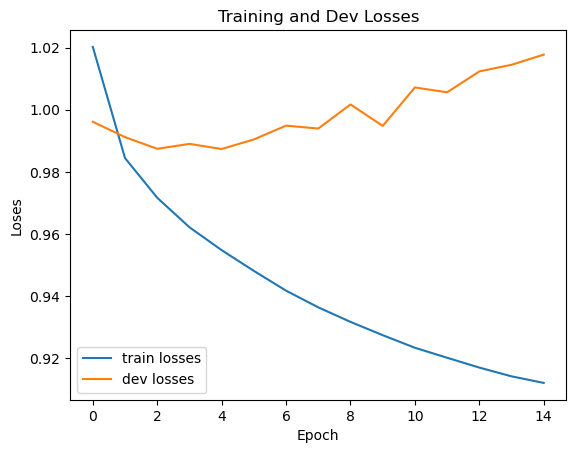

In [46]:
import matplotlib.pyplot as plt

# plot train and dev accuracy
plt.plot(train_epochs, label='train losses')
plt.plot(dev_epochs, label='dev losses')
plt.xlabel('Epoch')
plt.ylabel('Loses')
plt.title('Training and Dev Losses')
plt.legend()
plt.show()

In [48]:
# model comparison
from sklearn.metrics import accuracy_score, f1_score

# calculate predictions for both models
gold_labs_ant_model1, pred_labs_ant_model1 = predict_nn(ant_model1, test_loader)
gold_labs_ant_model2, pred_labs_ant_model2 = predict_nn(ant_model2, test_loader)

# accuracy and F1 score
accuracy_ant_model1 = accuracy_score(gold_labs_ant_model1, pred_labs_ant_model1)
f1_ant_model1 = f1_score(gold_labs_ant_model1, pred_labs_ant_model1, average='weighted')

accuracy_ant_model2 = accuracy_score(gold_labs_ant_model2, pred_labs_ant_model2)
f1_ant_model2 = f1_score(gold_labs_ant_model2, pred_labs_ant_model2, average='weighted')

print(f"Ant Model 1 - Accuracy: {accuracy_ant_model1*100:.2f}%, F1 Score: {f1_ant_model1:.2f}")
print(f"Ant Model 2 - Accuracy: {accuracy_ant_model2*100:.2f}%, F1 Score: {f1_ant_model2:.2f}")

Ant Model 1 - Accuracy: 53.83%, F1 Score: 0.51
Ant Model 2 - Accuracy: 43.15%, F1 Score: 0.40


# 3. Improving the Neural Text Classifier (max. 22 marks)

This section allows you some more free reign to experiment with the neural text classifier. Below, we list several to-dos that you can solve in your own way. Please make sure to label your notebook cells clearly so that it is obvious which to-do each cell corresponds to.

**TO-DO 3a:** Consider the neural text classifiers we have just implemented and the results you obtained in the last to-do. The classifiers have a number of limitations that we could improve. Describe three limitations and how you could improve them. For each improvement you propose, provide a brief explanation (up to 1 paragraph) of how it works. 

Hint: refer to the lectures for some ideas. **(9 marks)**

WRITE YOUR ANSWER HERE:


**TO-DO 3b:** Implement your improvements and compute the performance of your method. Make sure to comment your code to show where each new step is implemented. Use the validation set for any tuning you decide to do. Present your results clearly. **(13 marks)**

3a - limitations and how we can improve

1. Overfitting and Regularisation: As evidenced by the earlier plots, the models appear to overfit the training data, compromising their ability to generalise to unseen data. One potential solution is to implement regularisation techniques such as dropout. Dropout randomly nulls a fraction of the neurons' outputs during training, thereby preventing the model from depending excessively on any single input feature or a neuron and is implemented by adding an nn.Dropout(p) layer, where 'p' represents the dropout probability.

2. Static Pre-trained Embeddings: Currently, the weights of our pre-trained embeddings are 'frozen' during training, preventing the model from fine-tuning these embeddings to suit the specific task better. We could improve the model's performance by allowing the embeddings to be updated during training by setting freeze=False when establishing the embedding layer. However, this could lead to overfitting.

3. Limited Model Complexity: Our present model architecture is a simple feedforward neural network, which might be insufficient to capture more complex relationships within the text data. We could introduce additional hidden layers to our network to enhance the model's capabilities or even consider more sophisticated architectures such as Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, or transformer-based models. LSTM networks are particularly effective at handling sequential data as they can retain information over longer sequences.


## 3b - IMPLEMENTING IDEAS (regularisation, unfreeze embeddings, add hidden layers)

class FFTextClassifierWithEmbeddingsAR1(FFTextClassifierWithEmbeddings):

    def __init__(self, hidden_size, sequence_length, num_classes, embedding_matrix):
        super().__init__(hidden_size, sequence_length, num_classes, embedding_matrix)

        # changing the freeze parameter to False to unfreeze the weights
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=False)

hidden_size = 16      # increase from 8

ff_classifier_model_AR1 = FFTextClassifierWithEmbeddingsAR1(hidden_size = hidden_size,
                                                           sequence_length = sequence_length,
                                                           num_classes = num_classes,
                                                           embedding_matrix = embedding_matrix 
                                                           )

# initial update, no LSTM, superseded
class FFTextClassifierWithEmbeddingsAR1(FFTextClassifierWithEmbeddings):

    def __init__(self, hidden_size, sequence_length, num_classes, embedding_matrix, dropout_p=0.2):
        super().__init__(hidden_size, sequence_length, num_classes, embedding_matrix)

        # Changing the freeze parameter to False to unfreeze the weights
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=False)
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout_p)

    def forward(self, input_words):
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)

        # Flatten the sequence of embedding vectors for each document into a single vector.
        embedded_words = embedded_words.reshape(embedded_words.shape[0], sequence_length*self.embedding_size)  # batch_size, seq_length*embedding_size

        z = self.hidden_layer(embedded_words)   # (batch_size, seq_length, hidden_size)
        
        # Apply dropout after the activation function
        h = self.dropout(self.activation(z))

        output = self.output_layer(h)                      # (batch_size, num_classes)

        return output

hidden_size = 16      # Increase from 8

ff_classifier_model_AR1 = FFTextClassifierWithEmbeddingsAR1(hidden_size = hidden_size,
                                                           sequence_length = sequence_length,
                                                           num_classes = num_classes,
                                                           embedding_matrix = embedding_matrix 
                                                           )


In [58]:
# latest verrsion with LSTM

class FFTextClassifierWithEmbeddingsAR1(nn.Module):

    def __init__(self, hidden_size, sequence_length, num_classes, embedding_matrix, dropout_p=0.2):
        super().__init__()

        self.hidden_size = hidden_size
        self.embedding_size = embedding_matrix.shape[1]
        self.embedding_layer = nn.Embedding.from_pretrained(embedding_matrix, freeze=False)
        
        # LSTM layer
        self.lstm = nn.LSTM(self.embedding_size, hidden_size, batch_first=True)
        
        self.dropout = nn.Dropout(dropout_p)
        self.output_layer = nn.Linear(hidden_size, num_classes)

    def forward(self, input_words):
        embedded_words = self.embedding_layer(input_words)  # (batch_size, seq_length, embedding_size)

        # LSTM sequence of embeddings
        lstm_out, _ = self.lstm(embedded_words)  # (batch_size, seq_length, hidden_size)

        # final output for classification
        lstm_out = lstm_out[:, -1, :]  # (batch_size, hidden_size)
        
        # dropout
        h = self.dropout(lstm_out)
        
        output = self.output_layer(h)  # (batch_size, num_classes)

        return output

hidden_size = 16

ff_classifier_model_AR1 = FFTextClassifierWithEmbeddingsAR1(hidden_size = hidden_size,
                                                           sequence_length = sequence_length,
                                                           num_classes = num_classes,
                                                           embedding_matrix = embedding_matrix 
                                                           )


In [59]:
# test new version - increased layers, dropout layer, l2 regularisation and unfrozen weights, LSTM
ant_model3, train_epochs, dev_epochs = train_nn(num_epochs, ff_classifier_model_AR1, train_loader, dev_loader, l2_reg=1e-4)

Epoch: 1/15 Training Loss: 1.0231 Training Accuracy: 44.3451%
Epoch: 1/15 Validation Loss: 1.0182 Validation Accuracy: 43.4500% Time taken: 24.39 seconds
Epoch: 2/15 Training Loss: 1.0169 Training Accuracy: 45.1080%
Epoch: 2/15 Validation Loss: 1.0197 Validation Accuracy: 43.4500% Time taken: 21.05 seconds
Epoch: 3/15 Training Loss: 1.0164 Training Accuracy: 45.2395%
Epoch: 3/15 Validation Loss: 1.0203 Validation Accuracy: 43.4500% Time taken: 20.97 seconds
Epoch: 4/15 Training Loss: 1.0164 Training Accuracy: 45.2614%
Epoch: 4/15 Validation Loss: 1.0162 Validation Accuracy: 43.4500% Time taken: 21.51 seconds
Epoch: 5/15 Training Loss: 1.0165 Training Accuracy: 45.3118%
Epoch: 5/15 Validation Loss: 1.0174 Validation Accuracy: 43.4500% Time taken: 21.37 seconds
Epoch: 6/15 Training Loss: 1.0160 Training Accuracy: 45.3206%
Epoch: 6/15 Validation Loss: 1.0185 Validation Accuracy: 43.4500% Time taken: 22.38 seconds
Epoch: 7/15 Training Loss: 1.0163 Training Accuracy: 45.3162%
Epoch: 7/15 Va

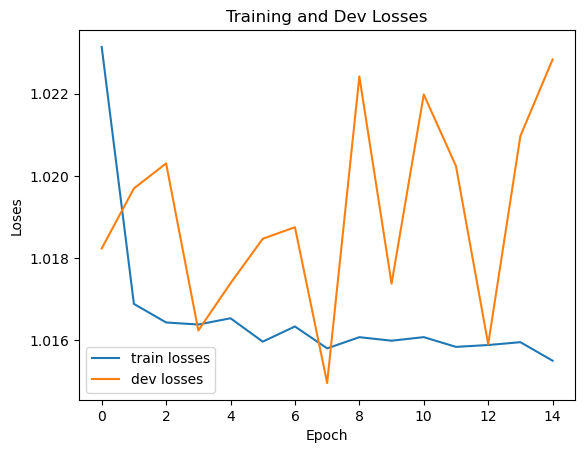

In [60]:
import matplotlib.pyplot as plt

# plot train and dev accuracy
plt.plot(train_epochs, label='train losses')
plt.plot(dev_epochs, label='dev losses')
plt.xlabel('Epoch')
plt.ylabel('Loses')
plt.title('Training and Dev Losses')
plt.legend()
plt.show()

In [61]:
# check for improved performance

from sklearn.metrics import accuracy_score, f1_score

# Generate predictions for both models
gold_labs_ant_model1, pred_labs_ant_model1 = predict_nn(ant_model1, test_loader)
gold_labs_ant_model3, pred_labs_ant_model3 = predict_nn(ant_model3, test_loader)

# Calculate accuracy and F1 score for both models
accuracy_ant_model1 = accuracy_score(gold_labs_ant_model1, pred_labs_ant_model1)
f1_ant_model1 = f1_score(gold_labs_ant_model1, pred_labs_ant_model1, average='weighted')

accuracy_ant_model3 = accuracy_score(gold_labs_ant_model3, pred_labs_ant_model3)
f1_ant_model3 = f1_score(gold_labs_ant_model3, pred_labs_ant_model3, average='weighted')

print(f"Ant Model 1 - Accuracy: {accuracy_ant_model1*100:.2f}%, F1 Score: {f1_ant_model1:.2f}")
print(f"Ant Model 3 - Accuracy: {accuracy_ant_model3*100:.2f}%, F1 Score: {f1_ant_model3:.2f}")


Ant Model 1 - Accuracy: 53.83%, F1 Score: 0.51
Ant Model 3 - Accuracy: 48.33%, F1 Score: 0.31
